In [14]:
import matplotlib.pyplot as plt
import random
from __future__ import print_function
from pathlib import Path
from random import shuffle
import random

import argparse
import copy
import networkx as nx
import numpy as np
import sys
import tensorflow as tf
import igraph as ig

from deeplp.models.data_prep import create_weighted_graph, load_data
from deeplp.models.data_prep import prepare_data, random_unlabel, calc_masks
from deeplp.models.deeplp_att import DeepLP_ATT
from deeplp.models.deeplp_edge import DeepLP_Edge
from deeplp.models.deeplp_wrbf import DeepLP_WRBF
from deeplp.models.lp import LP
from deeplp.models.utils import accuracy, indices_to_vec
from deeplp.models.data_prep import select_features
from datasets import utils
color_list = {
    0: '#E97778',
    1: '#bf1a2f',
    2: '#454e9e',
    6: '#89C7B6',
    4: '#f7d002',
    5: '#41ead4',
    3: '#FFD57E'
}

In [181]:
true_labels, features, edge_features, node_features, graph \
= load_data('cora','linqs',directed=1,confidence=0)
U,D,B,R,node_features = utils.load_data('cora','linqs','datasets')
edges = np.array(B.edges())
sources,sinks = edges[:,0],edges[:,1]
labeled_indices, unlabeled_indices = \
        random_unlabel(true_labels,0.99,features,
                       seed=0,confidence=0)
org=np.loadtxt('org.csv',delimiter=',')
opt=np.loadtxt('opt.csv',delimiter=',')

-----------cora-----------
Loading labels...
Loading features...
Loading edge features...
Weights: Asymmetric
Loading graph...
Done!


In [182]:
labeled_indices

array([  21,  100,  278,  466,  539,  707,  757,  879,  979, 1383, 1390,
       1706, 1783, 1833, 1866, 1877, 1946, 2014, 2052, 2126, 2141, 2169,
       2228, 2229, 2369])

In [172]:
neighbors_node_indices[~np.in1d(np.argmax(true_labels[neighbors_node_indices],axis=1),[6,0,2,3])]

array([  85,  748, 1497, 1582, 1698, 2194])

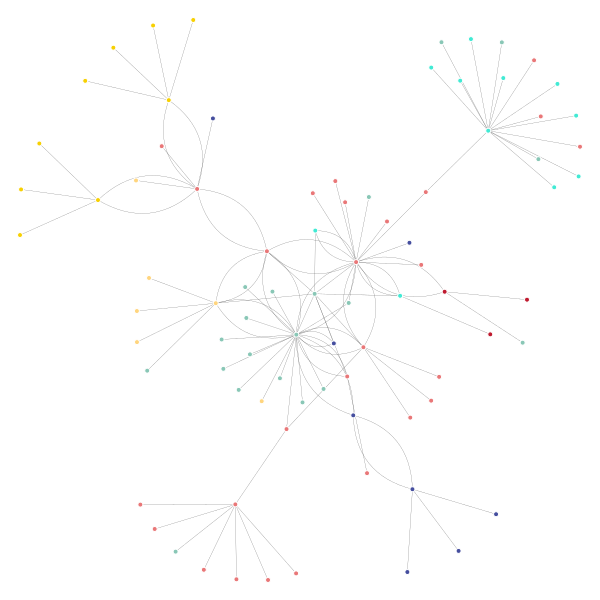

In [176]:
random_u_indices = np.array(list(set([11,164,  1187, 1212, 1319, 1527, 1621, 1624,
       1851, 2044, 2050, 85,  748, 1497, 1582, 1698, 2194])))
neighbors_node_indices = random_u_indices
for this in random_u_indices:
    neighbors_node_indices = np.append(neighbors_node_indices,graph[this].indices)
neighbors_node_indices = np.sort(list(set(neighbors_node_indices))).astype(int)
G = nx.from_scipy_sparse_matrix(graph[neighbors_node_indices][:,neighbors_node_indices])
colors = [color_list[label] for label in np.argmax(true_labels[neighbors_node_indices],axis=1)]
colors = np.array(colors)
coo = graph[neighbors_node_indices][:,neighbors_node_indices].tocoo()
cols = coo.col
rows = coo.row
org_rows = graph.tocoo().row
org_cols = graph.tocoo().col
edge_indices = []
rsub = []
csub = []
seqs = []
i = 0
prev = rows[0]
for r,c in zip(rows,cols):
    if neighbors_node_indices[r] in random_u_indices:
        if r == prev:
            i += 1
        else:
            i = 1
            c
        
        rsub.append(r)
        csub.append(c)
        edge_indices.append(np.where((org_rows == neighbors_node_indices[r]) & (org_cols == neighbors_node_indices[c]))[0][0])
        prev = r
a=np.vstack([rsub,csub])
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
# a = list(zip(*nx.to_edgelist(G)))[:2]
g1 = ig.Graph(len(G), list(zip(*np.flip(a,0))),directed=False)
layout = g1.layout()
# g1.vs['label'] = labels
# g1.es['width'] = np.random.uniform(low=0.0, high=1.0, size=int(np.sum(graph)))
g1.es['width'] = org * 1/org / 5
ig.plot(g1,layout=layout, vertex_color=colors, vertex_size=5, vertex_label_dist=2, edge_arrow_size=0.0, vertex_frame_color='white')
# ig.plot(g1,vertex_color=colors, vertex_size=5, layout=layout)
# ,vertex_size=utils.listify(G.degree())

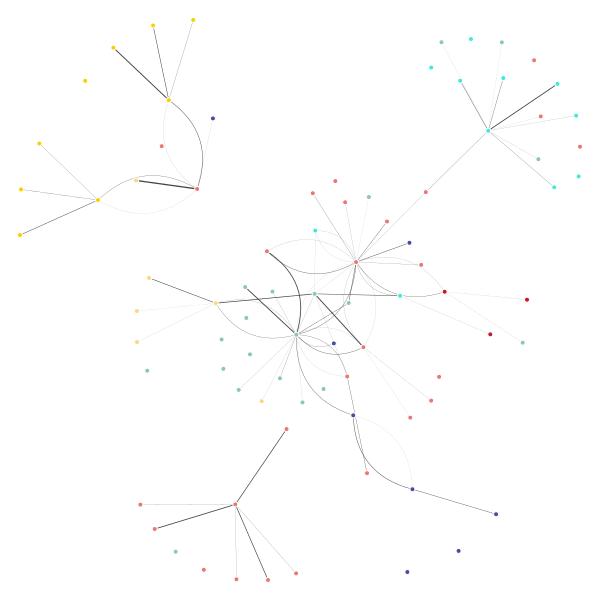

In [177]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
# a = list(zip(*nx.to_edgelist(G)))[:2]
g1 = ig.Graph(len(G), list(zip(*np.flip(a,0))),directed=False)
# g1.vs['label'] = labels
# g1.es['width'] = np.random.uniform(low=0.0, high=1.0, size=int(np.sum(graph)))
g1.es['width'] = opt * 1/org / 5
ig.plot(g1,layout=layout, vertex_color=colors, vertex_size=5, vertex_label_dist=2, edge_arrow_size=0.0, vertex_frame_color='white')
# ig.plot(g1,vertex_color=colors, vertex_size=5, layout=layout)
# ,vertex_size=utils.listify(G.degree())

array([1., 1., 1., ..., 1., 1., 1.])

In [119]:
opt * 1/org

array([0.07797429, 4.10415052, 0.07635266, ..., 1.82324418, 0.18692409,
       0.98983173])